In [129]:
ID = '011_1'

# Prediction result

In [130]:
import re
import pandas as pd

# Initialize lists to store timestamps and average values
timestamps = []
averages = []

# Read the data from the file
with open(f'{ID}/dl_engine_result_{ID}.txt', 'r') as file:
    data = file.readlines()

# Extract the prediction labels sand timestamps from each line
buffer = " "
for line in data:
    buffer += line.strip() + " "
    match = re.search(r'Prediction Time: (.*?), Prediction Label: \[\[(.*?)\]\]', buffer)
    if match:
        timestamp = match.group(1)
        labels = match.group(2).split()
        average = sum([float(x) for x in labels]) / len(labels)
        timestamps.append(timestamp)
        averages.append(average)
        buffer = " "  # Reset buffer after a successful match

# Create a dataframe with the extracted data
df_predictions = pd.DataFrame({'timestamp': timestamps, 'average': averages})
df_predictions['average'] = df_predictions['average'].clip(0, 1)

# Display the dataframe
print(df_predictions)

# df_predictions['timestamp'] = pd.to_datetime(df_predictions['timestamp'])
# plt = df_predictions.plot(y='timestamp', title='Average prediction value over time')
# plt.show()

                    timestamp   average
0     2025-03-14 18:13:37.536  0.000000
1     2025-03-14 18:13:37.573  0.156538
2     2025-03-14 18:13:37.608  0.000000
3     2025-03-14 18:13:37.644  0.454077
4     2025-03-14 18:13:37.678  0.461004
...                       ...       ...
1628  2025-03-14 18:26:14.439  0.852700
1629  2025-03-14 18:26:15.304  0.852700
1630  2025-03-14 18:26:16.154  0.852700
1631  2025-03-14 18:26:16.983  0.852700
1632  2025-03-14 18:26:17.809  0.852700

[1633 rows x 2 columns]


# Glove data

In [131]:
import pandas as pd

# Load the CSV file, skipping the first line
df_manual_prime2 = pd.read_csv(f'{ID}/manual_prime2_logger-{ID}.csv', skiprows=1, low_memory=False)

# Extract the timestamp from the first column and add it as a new column
df_manual_prime2['timestamp'] = df_manual_prime2.iloc[:, 0].str.extract(r'\[(.*?)\]')

# Extract the fingerID column
df_manual_prime2['fingerID'] = df_manual_prime2.iloc[:, 1]

# Filter out rows where fingerID is 0
df_manual_prime2 = df_manual_prime2[df_manual_prime2['fingerID'] != 0]

# Filter columns that contain "bending_normalized" in their name
bending_normalized_columns = [col for col in df_manual_prime2.columns if 'pip_joint_finger_bending_normalized' in col or 'dip_joint_finger_bending_normalized' in col]

# Create a DataFrame with the timestamp and the filtered columns
df_bending_normalized = df_manual_prime2[['timestamp', 'fingerID'] + bending_normalized_columns]

# Convert the bending_normalized columns to float
for col in bending_normalized_columns:
    df_bending_normalized[col] = pd.to_numeric(df_bending_normalized[col], errors='coerce')

# Display the data of the filtered columns and the average
print(df_bending_normalized)

# Calculate the sum of pip_joint_finger_bending_normalized and dip_joint_finger_bending_normalized for each row
df_bending_normalized['bending_sum'] = (df_bending_normalized[' pip_joint_finger_bending_normalized'] + df_bending_normalized[' dip_joint_finger_bending_normalized'])/2

# Group by timestamp and calculate the average of the bending_sum across all fingers
df_avg_bending = df_bending_normalized.groupby('timestamp')['bending_sum'].mean().reset_index()

# Rename the columns
df_avg_bending.columns = ['timestamp', 'average_bending_sum']

# Display the new DataFrame
print(df_avg_bending)

                      timestamp  fingerID  \
1       2025-03-14 18:13:25.309       1.0   
2       2025-03-14 18:13:25.309       2.0   
3       2025-03-14 18:13:25.309       3.0   
4       2025-03-14 18:13:25.309       4.0   
6       2025-03-14 18:13:25.325       1.0   
...                         ...       ...   
214226  2025-03-14 18:26:11.367       1.0   
214227  2025-03-14 18:26:11.367       2.0   
214228  2025-03-14 18:26:11.367       3.0   
214229  2025-03-14 18:26:11.367       4.0   
214230  2025-03-14 18:26:12.081       NaN   

         pip_joint_finger_bending_normalized  \
1                                       1.00   
2                                       0.80   
3                                       1.00   
4                                       0.63   
6                                       1.00   
...                                      ...   
214226                                  0.08   
214227                                  0.04   
214228                     

/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_50057/1796650283.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bending_normalized[col] = pd.to_numeric(df_bending_normalized[col], errors='coerce')
/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_50057/1796650283.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bending_normalized['bending_sum'] = (df_bending_normalized[' pip_joint_finger_bending_normalized'] + df_bending_normalized[' dip_joint_finger_bending_normalized'])

# Game Log

In [132]:
# Read the game log data from the file
with open(f'{ID}/game_log_{ID}.txt', 'r') as file:
    data = file.readlines()

# Create a DataFrame from the sample data
df_game_log = pd.DataFrame(data, columns=['log'])

# Extract the timestamp, description, and STIM code from each log entry
df_game_log['timestamp'] = df_game_log['log'].str.extract(r'(\d{1,2}/\d{1,2}/\d{4} \d{1,2}:\d{2}:\d{2} [APM]{2})')
df_game_log['description'] = df_game_log['log'].str.extract(r': (.*?) \(STIM Code:')
df_game_log['stim'] = df_game_log['log'].str.extract(r'STIM Code: (\d+)').astype(int)

# Display the new DataFrame
print(df_game_log)

                                                   log             timestamp  \
0    14/3/2025 6:14:16 PM: Fruit_1 start (STIM Code...  14/3/2025 6:14:16 PM   
1           14/3/2025 6:14:17 PM: Cue (STIM Code: 2)\n  14/3/2025 6:14:17 PM   
2    14/3/2025 6:14:19 PM: Pacman pass fruit (STIM ...  14/3/2025 6:14:19 PM   
3           14/3/2025 6:14:22 PM: Cue (STIM Code: 2)\n  14/3/2025 6:14:22 PM   
4    14/3/2025 6:14:24 PM: Pacman eat fruit (STIM C...  14/3/2025 6:14:24 PM   
..                                                 ...                   ...   
266         14/3/2025 6:25:31 PM: Cue (STIM Code: 5)\n  14/3/2025 6:25:31 PM   
267         14/3/2025 6:25:33 PM: Cue (STIM Code: 5)\n  14/3/2025 6:25:33 PM   
268  14/3/2025 6:25:34 PM: Ghost_id_1 survived (STI...  14/3/2025 6:25:34 PM   
269  14/3/2025 6:25:36 PM: Ghost_5 lose (STIM Code:...  14/3/2025 6:25:36 PM   
270   14/3/2025 6:25:59 PM: Game quit (STIM Code: 9)\n  14/3/2025 6:25:59 PM   

             description  stim  
0     

# Visualization

In [133]:
# Convert timestamps to datetime
df_predictions['timestamp'] = pd.to_datetime(df_predictions['timestamp'])
df_avg_bending['timestamp'] = pd.to_datetime(df_avg_bending['timestamp'])
df_game_log['timestamp'] = pd.to_datetime(df_game_log['timestamp'])

# Merge the two DataFrames on the nearest timestamp
# df_merged = pd.merge_asof(df_predictions.sort_values('timestamp'), df_avg_bending.sort_values('timestamp'), on='timestamp')
df_merged = pd.merge_asof(df_avg_bending.sort_values('timestamp'), df_predictions.sort_values('timestamp'), on='timestamp')
df_merged.columns = ['timestamp', 'prediction_value', 'actual_value']

/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_50057/2926846960.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_game_log['timestamp'] = pd.to_datetime(df_game_log['timestamp'])


[(0, 22), (23, 45), (46, 53), (54, 96), (97, 106), (107, 149), (150, 159), (160, 202), (203, 215), (216, 258), (259, 269)]


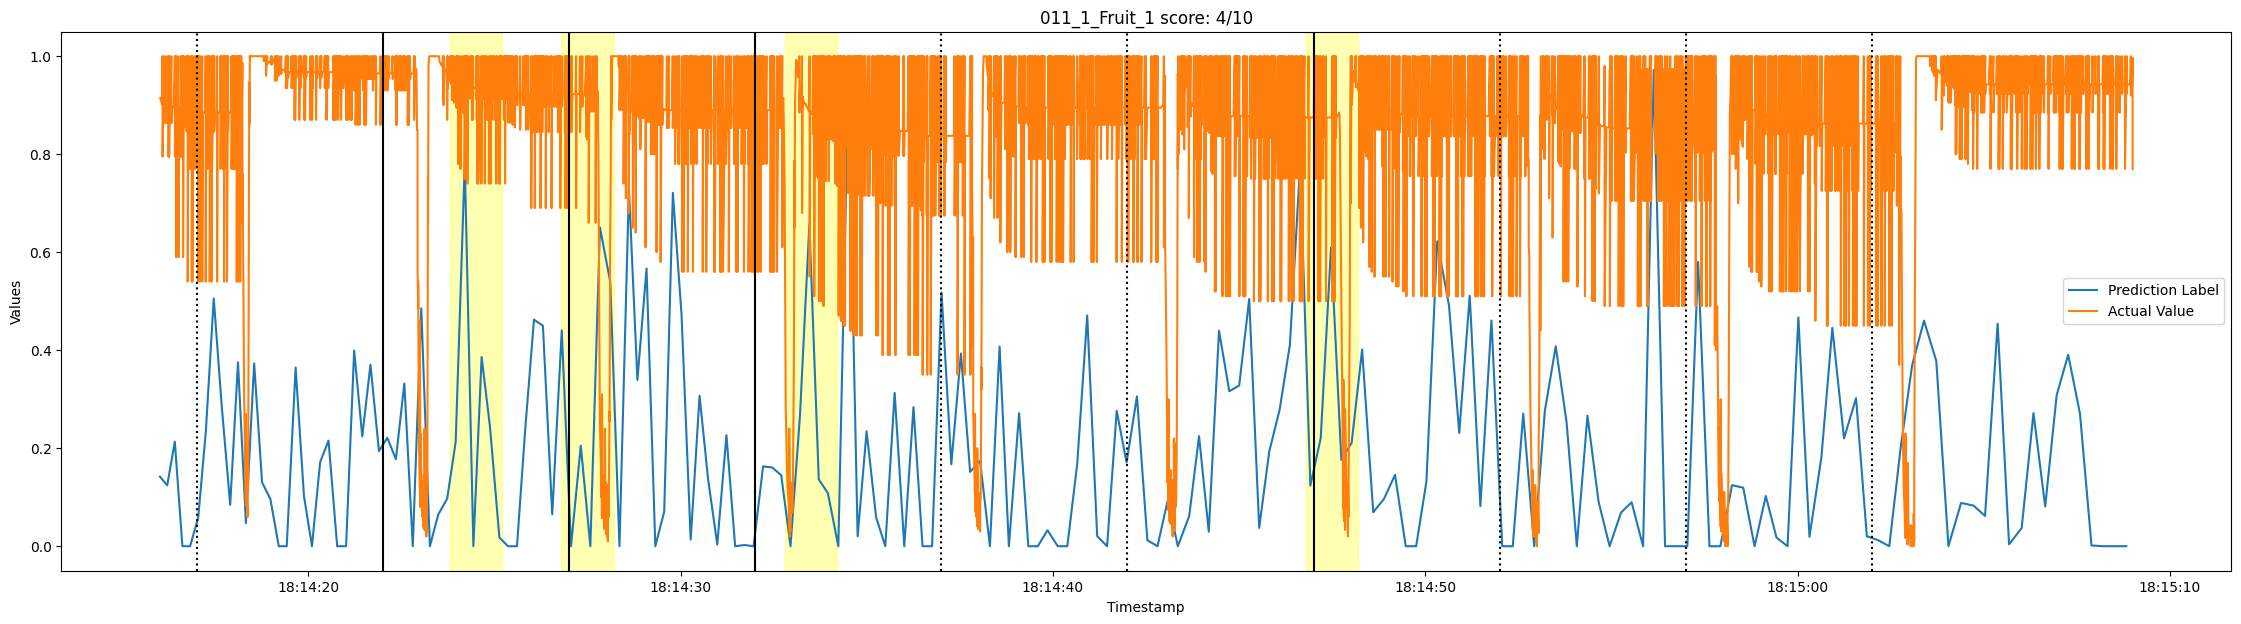

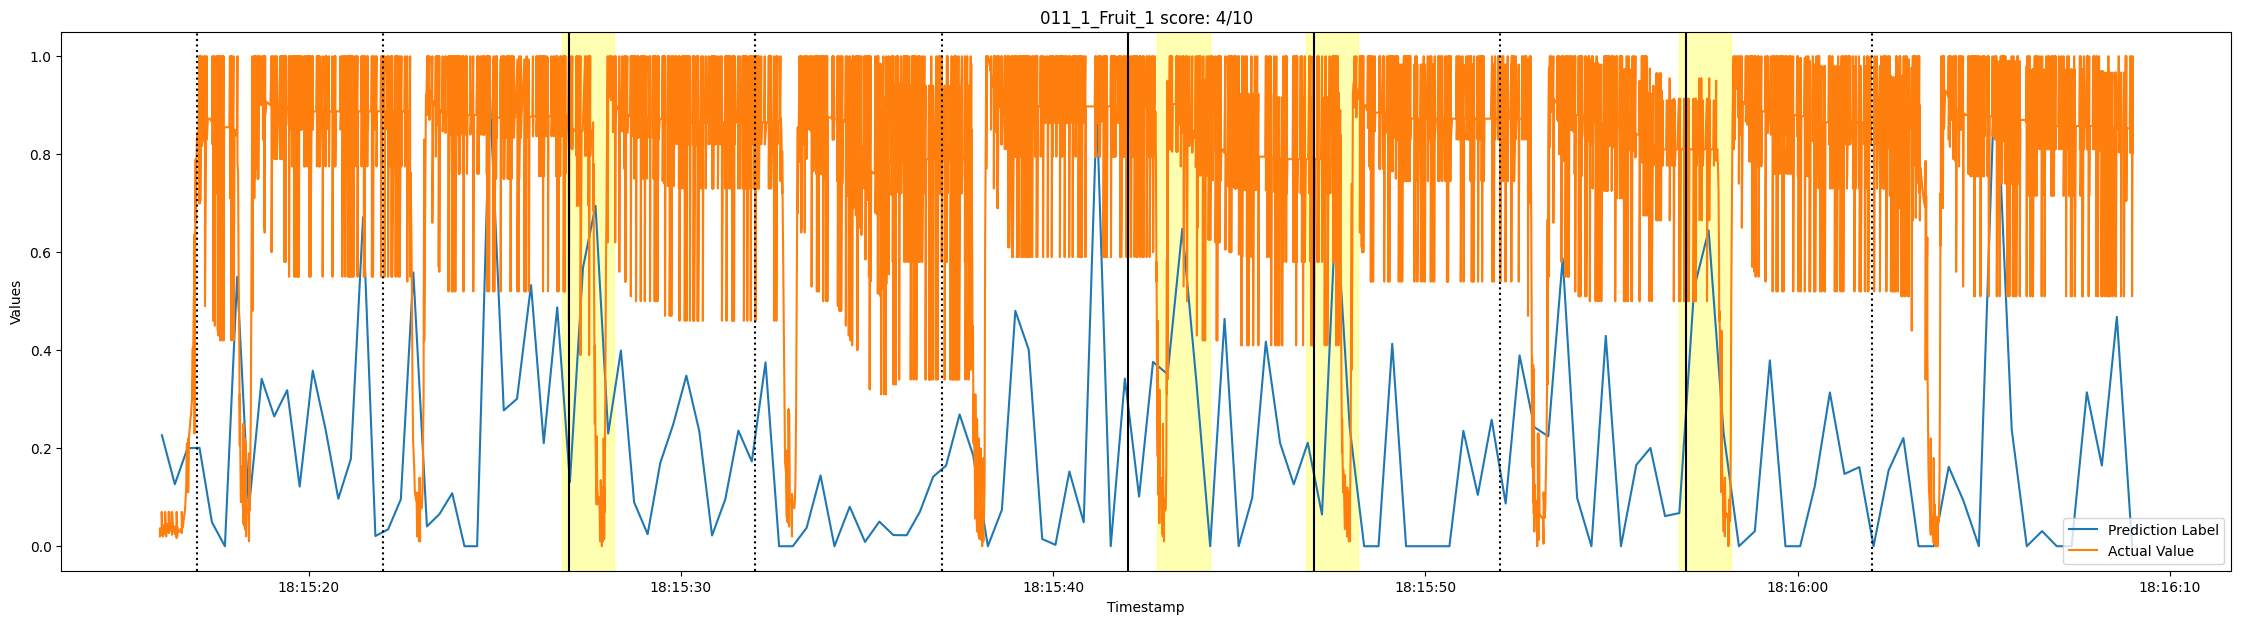

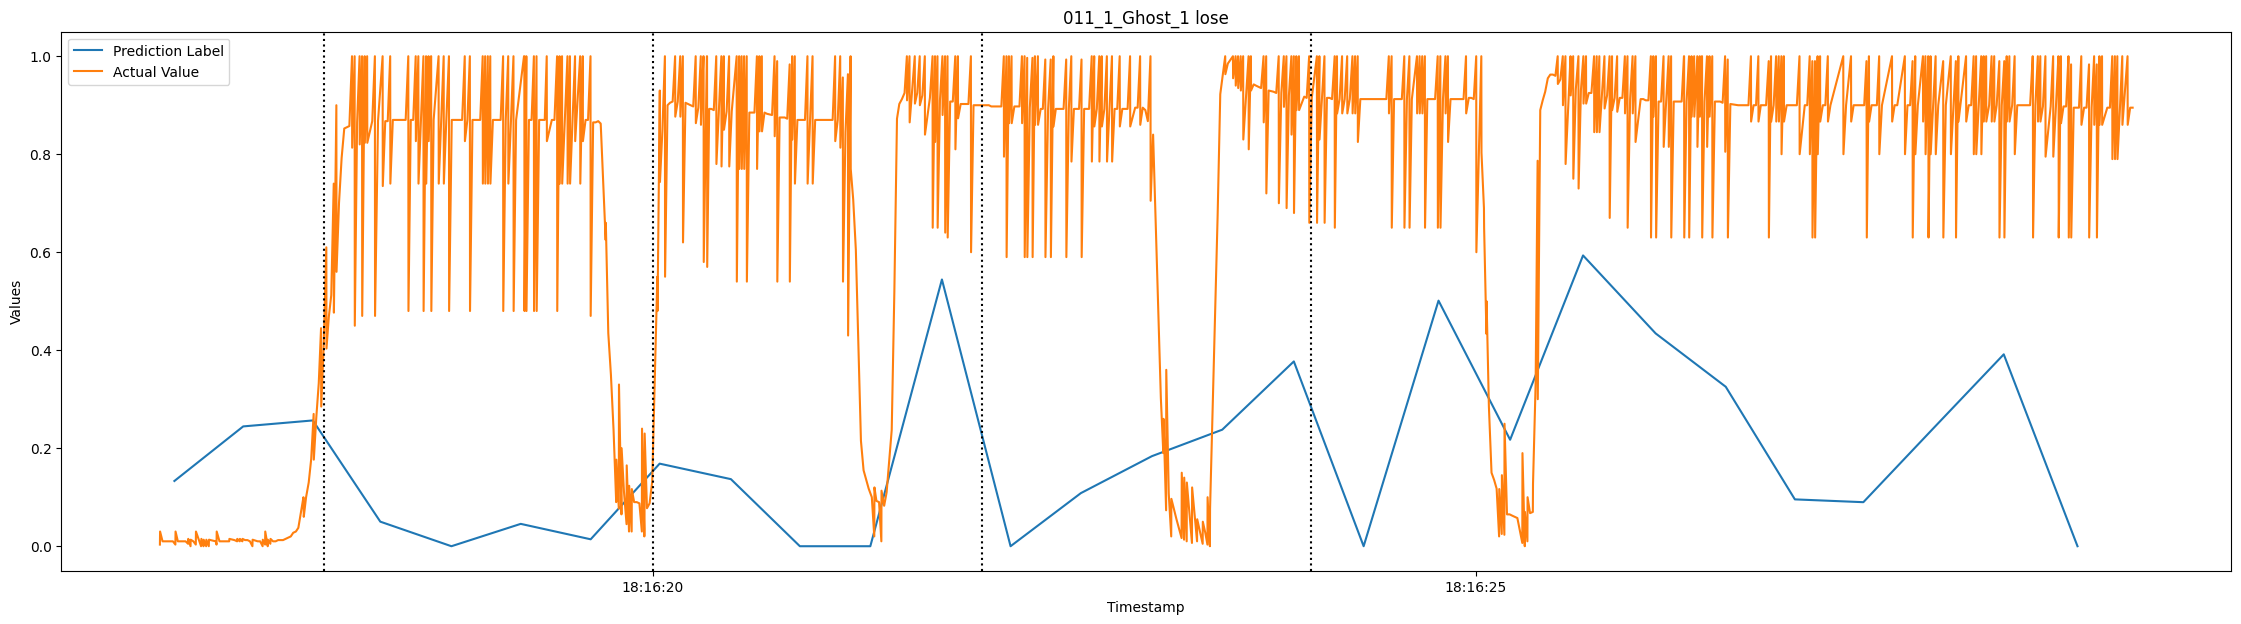

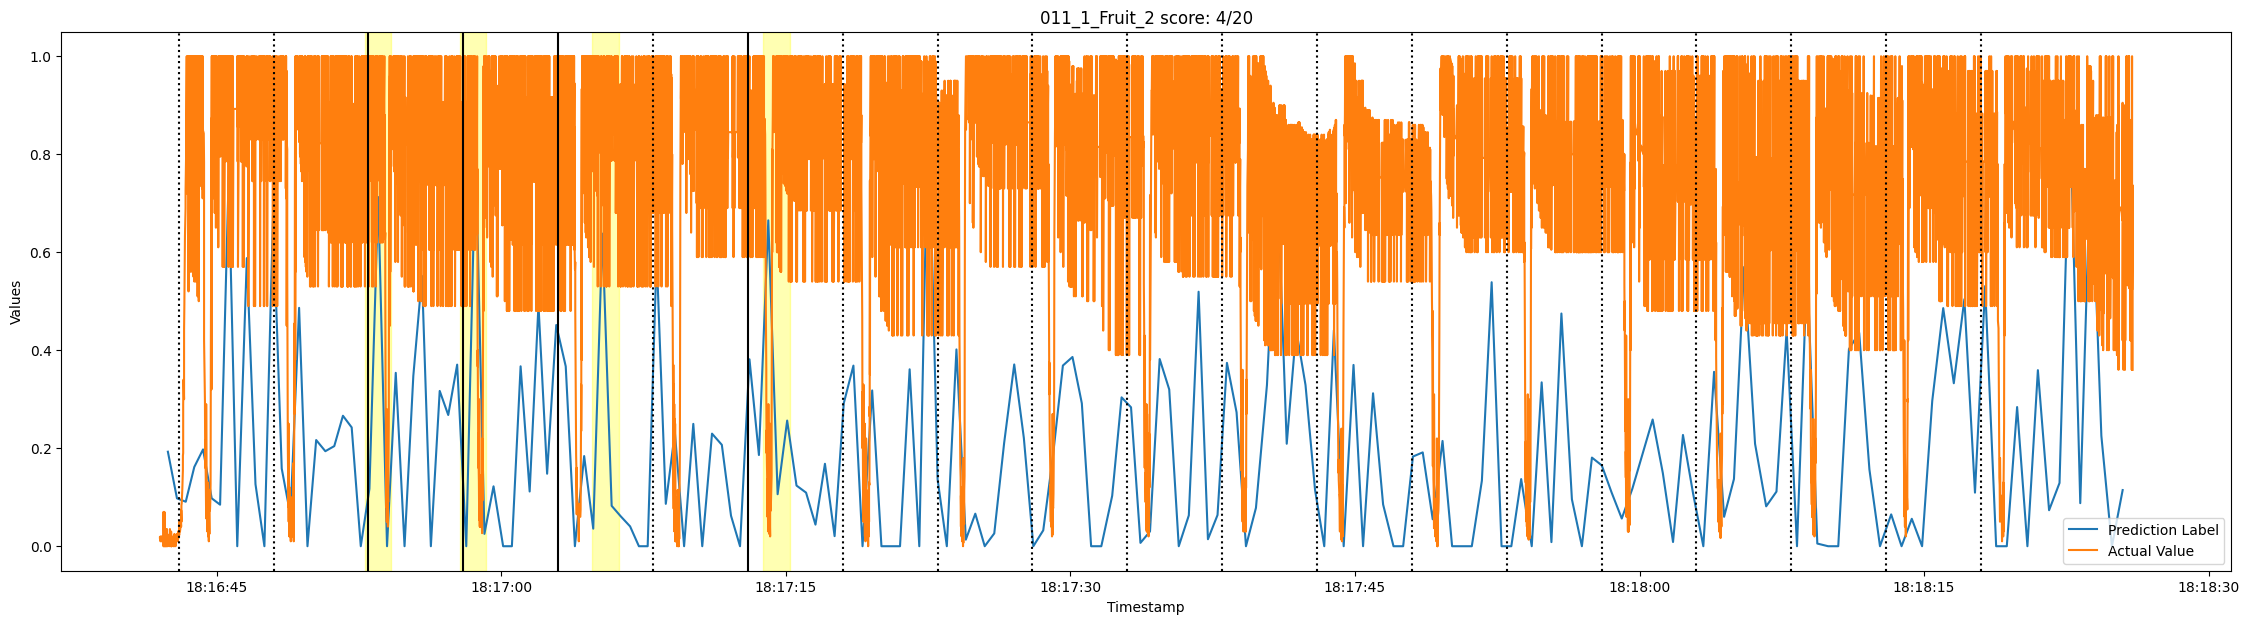

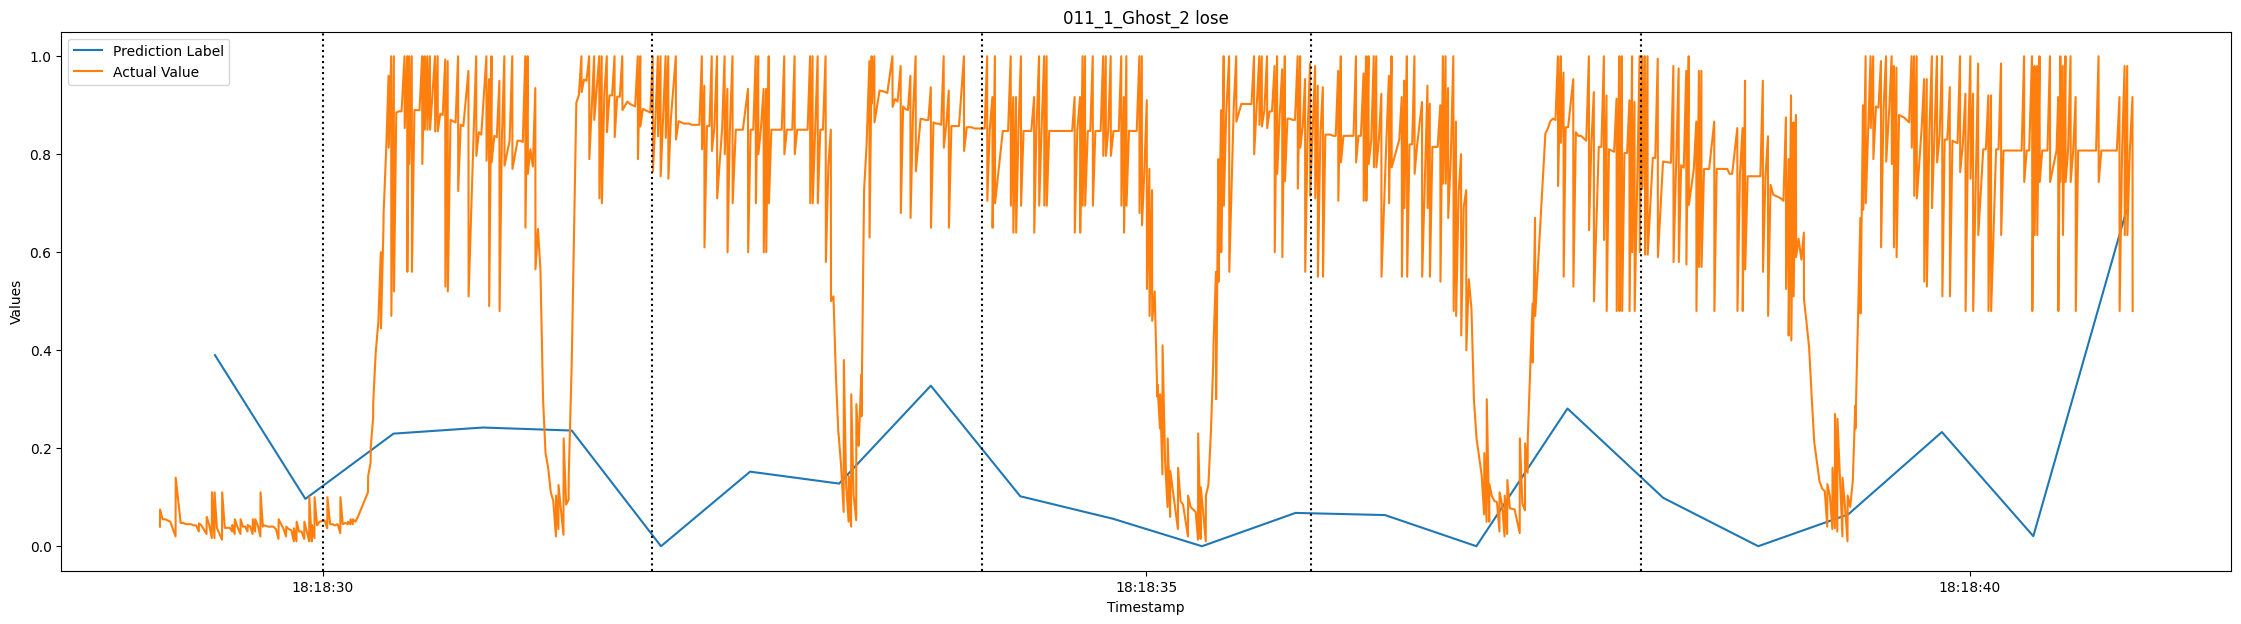

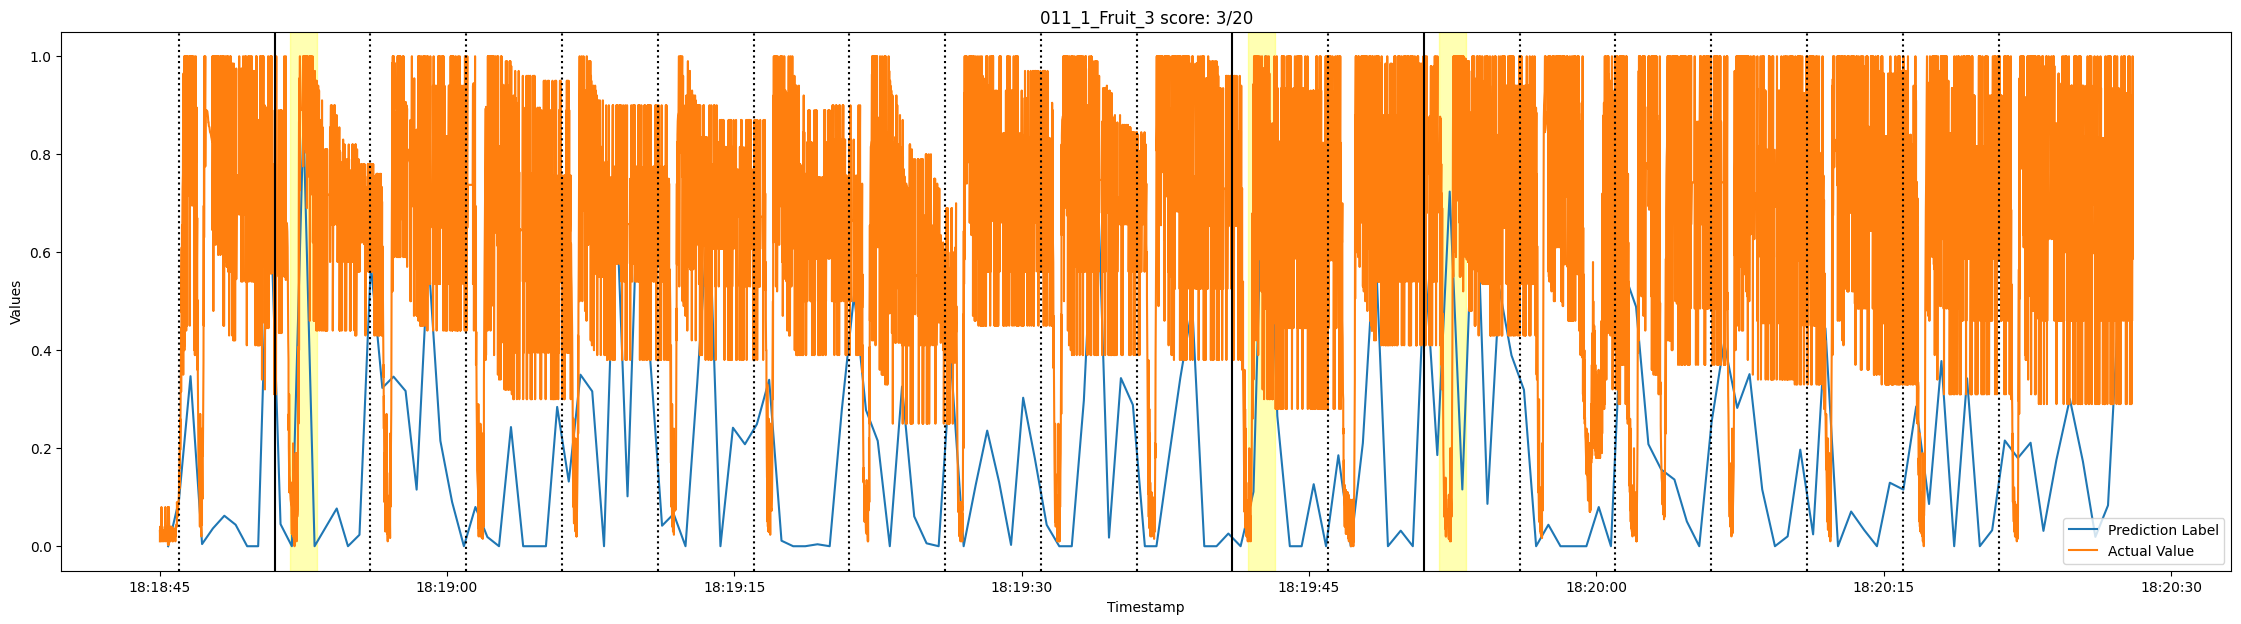

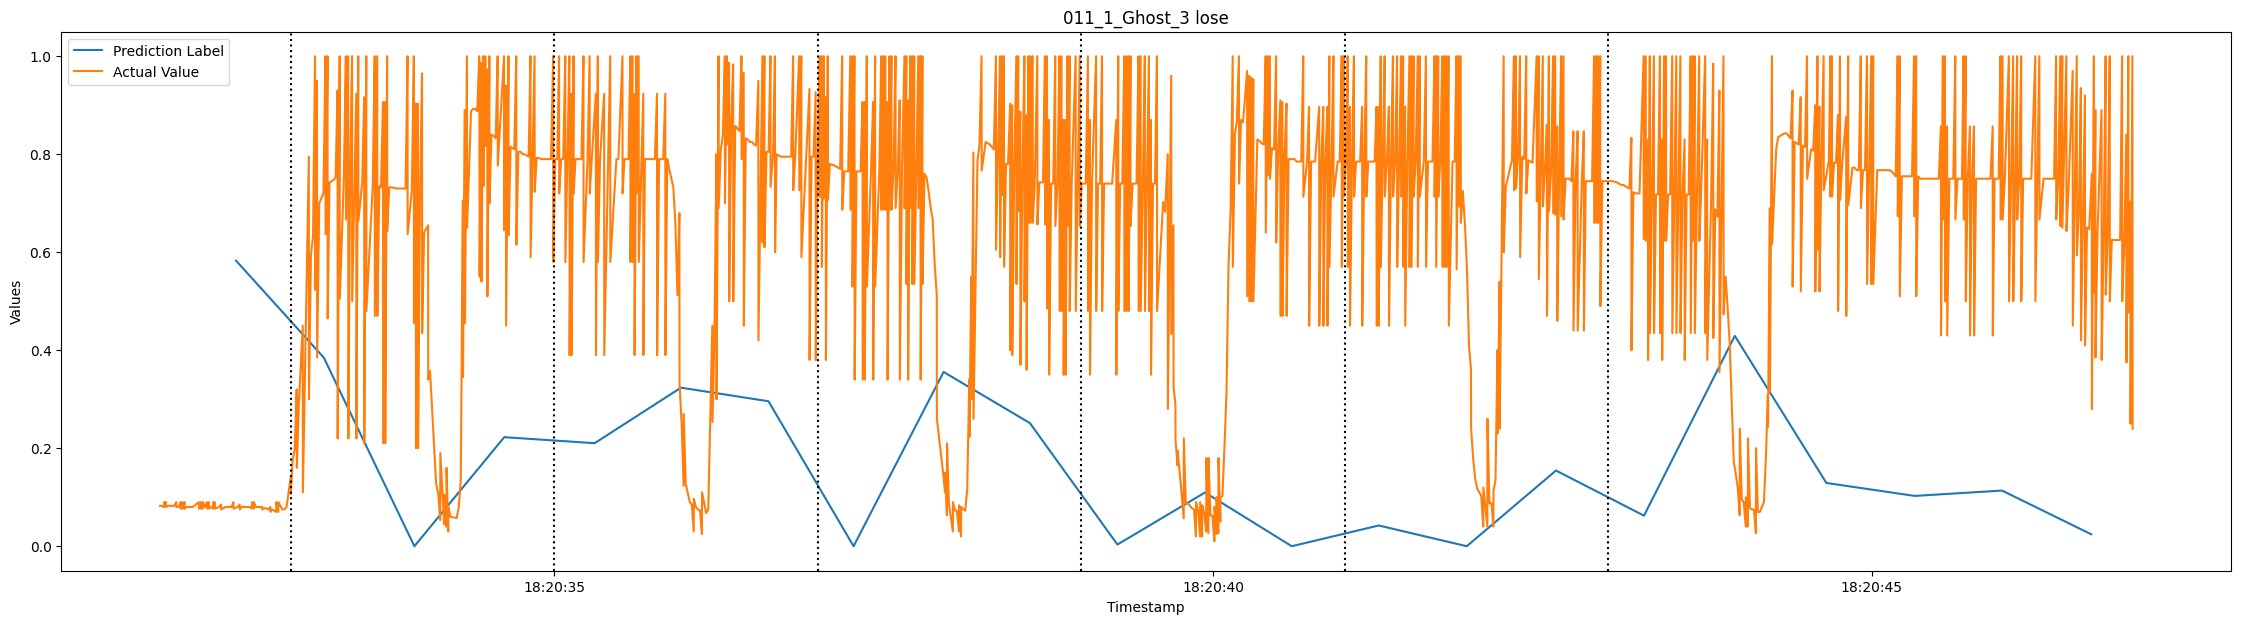

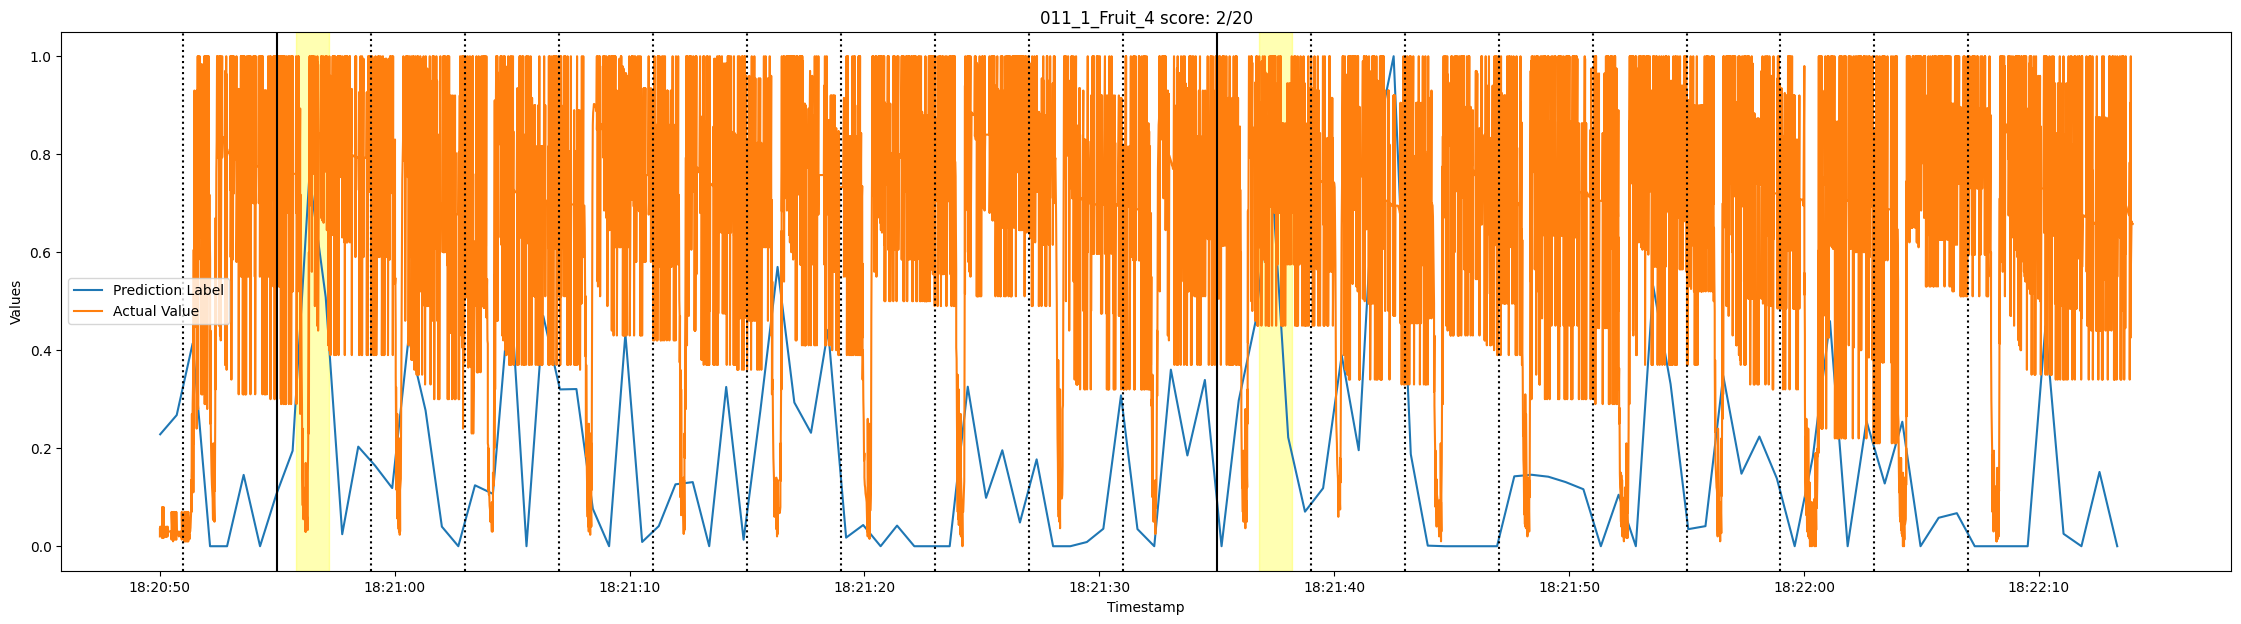

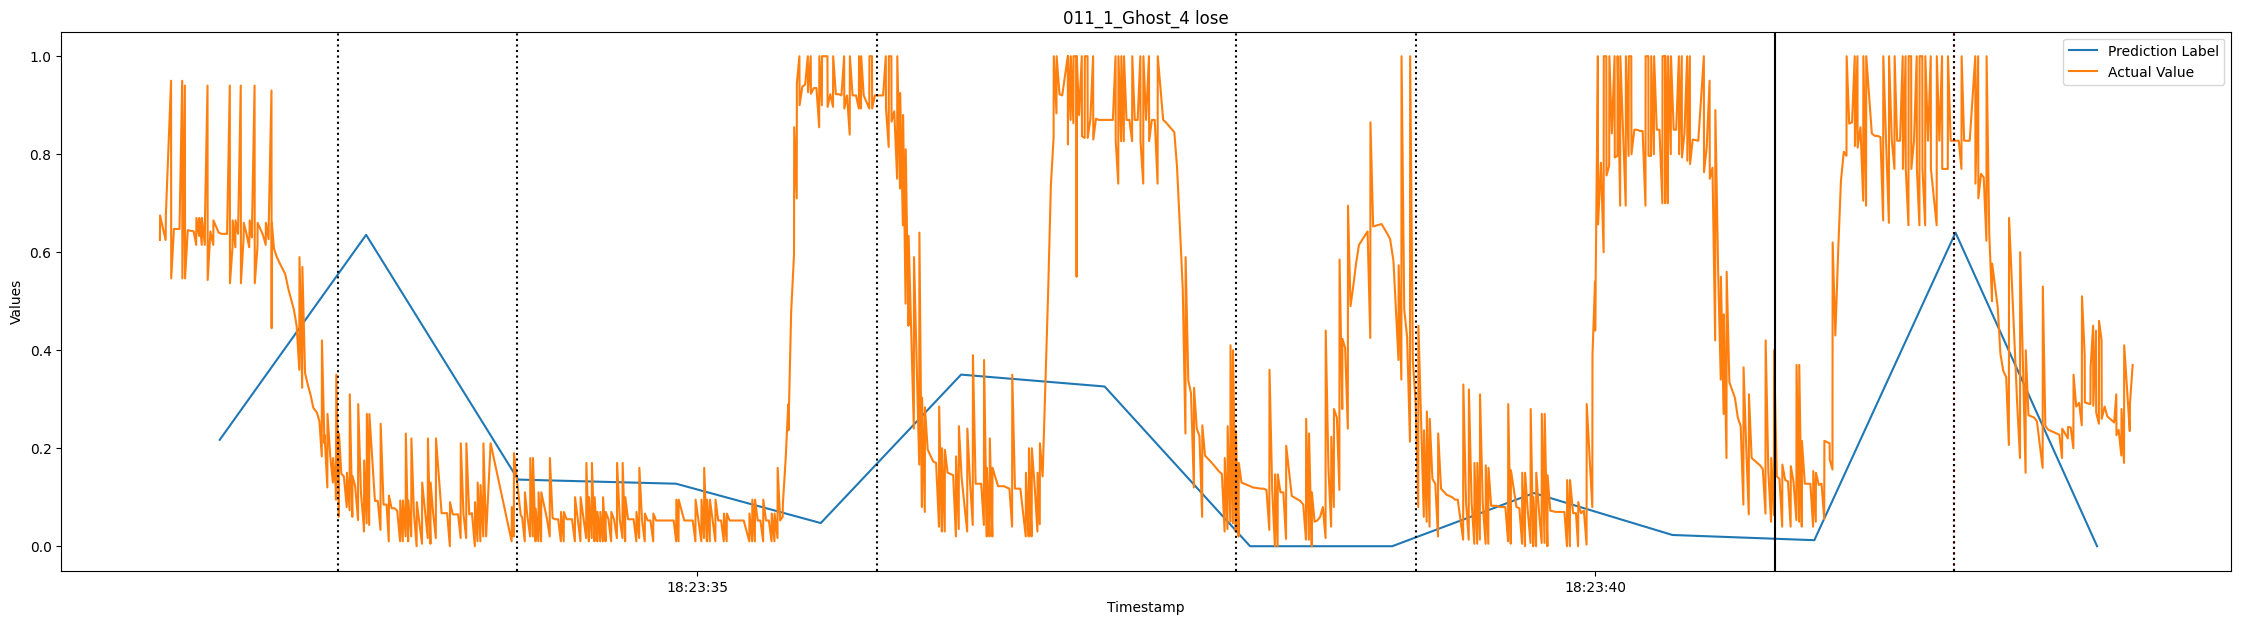

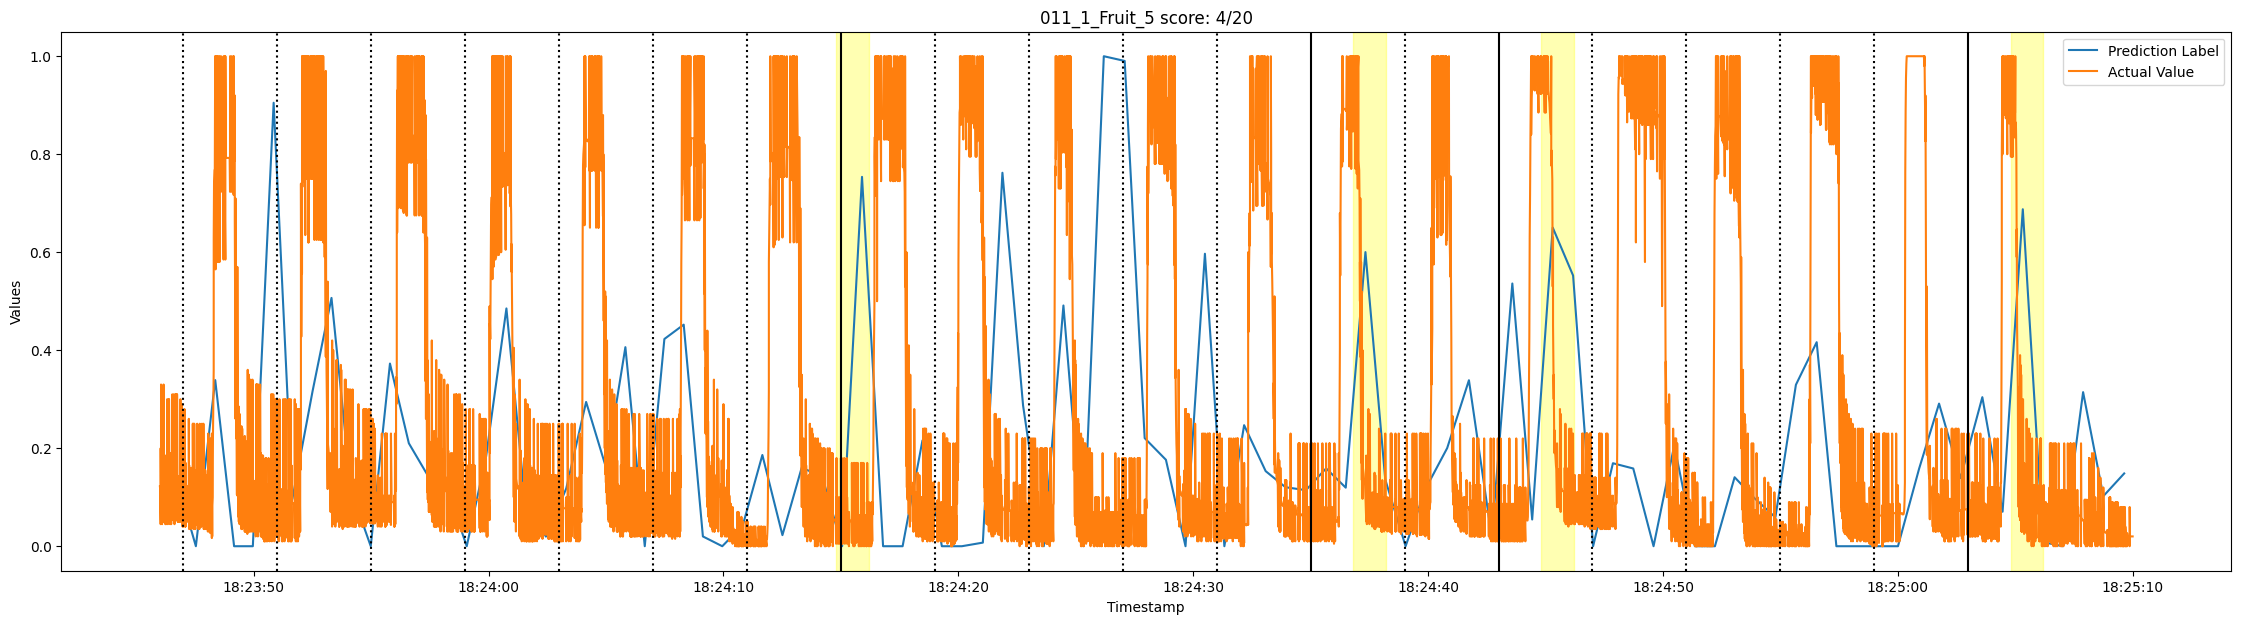

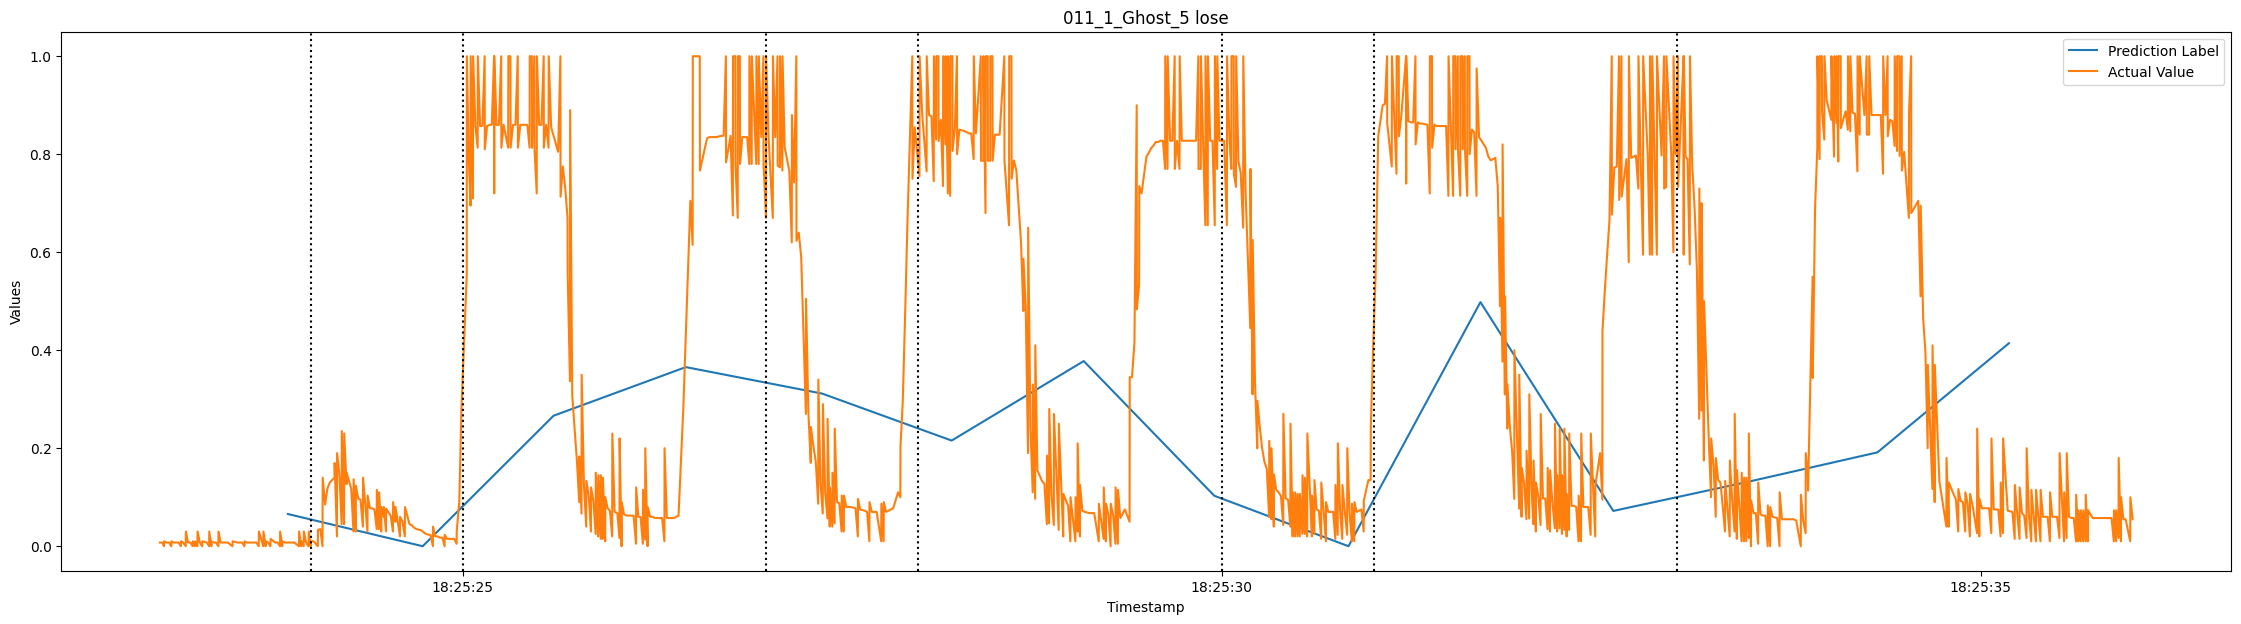

In [134]:
import matplotlib.pyplot as plt

# Find segments separated by specific stim codes
segments = []
i = 0
while i < len(df_game_log) - 1:
    if df_game_log.iloc[i]['stim'] == 1:
        for j in range(i + 1, len(df_game_log)):
            if df_game_log.iloc[j]['stim'] in [30, 31]:
                segments.append((i, j))
                i = j
                break
    elif df_game_log.iloc[i]['stim'] == 4:
        for j in range(i + 1, len(df_game_log)):
            if df_game_log.iloc[j]['stim'] in [70, 71]:
                segments.append((i, j))
                i = j
                break
    i += 1

print(segments)

# Plot the data for each segment
for start_index, end_index in segments:
    start_time_seconds = df_game_log.iloc[start_index]['timestamp']
    end_time_seconds = df_game_log.iloc[end_index]['timestamp']
    
    # segment = df_merged[(df_merged['timestamp'] >= start_time_seconds) & (df_merged['timestamp'] <= end_time_seconds)]
    prediction_segment = df_predictions[(df_predictions['timestamp'] >= start_time_seconds) & (df_predictions['timestamp'] <= end_time_seconds)]
    glove_segment = df_avg_bending[(df_avg_bending['timestamp'] >= start_time_seconds) & (df_avg_bending['timestamp'] <= end_time_seconds)]
    
    plt.figure(figsize=(28, 7))
    plt.plot(prediction_segment['timestamp'], prediction_segment['average'], label='Prediction Label')
    plt.plot(glove_segment['timestamp'], glove_segment['average_bending_sum'], label='Actual Value')
    
    # Draw the vertical lines
    stim_row = df_game_log[(df_game_log['timestamp'] >= start_time_seconds) & (df_game_log['timestamp'] <= end_time_seconds)]
    for k in range(len(stim_row) - 1):
        if stim_row.iloc[k]['stim'] == 2 and stim_row.iloc[k + 1]['stim'] == 21:
            plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle='-')
            middle_highlight = stim_row.iloc[k+1]['timestamp']
            start_highlight = middle_highlight - pd.Timedelta(milliseconds=200)
            end_highlight = middle_highlight + pd.Timedelta(milliseconds=1200)
            plt.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3)
        elif stim_row.iloc[k]['stim'] == 2 and stim_row.iloc[k + 1]['stim'] == 20:
            plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle=':')
        elif stim_row.iloc[k]['stim'] == 5 and stim_row.iloc[k + 1]['stim'] == 51:
            plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle='-')
            plt.axvline(x=stim_row.iloc[k+1]['timestamp'], color='red', linestyle=':')
        elif stim_row.iloc[k]['stim'] == 5 and stim_row.iloc[k + 1]['stim'] != 51:
            plt.axvline(x=stim_row.iloc[k]['timestamp'], color='black', linestyle=':')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Values')
    if df_game_log.iloc[start_index]['stim'] == 1:
        plt.title(f"{ID}_{df_game_log.iloc[end_index-1]['description']}")
    else:               
        plt.title(f"{ID}_{df_game_log.iloc[end_index]['description']}")
    plt.legend()

    # Save the plot
    plt.savefig(f"{ID}/{ID}_{df_game_log.iloc[end_index]['description']}_{df_game_log.iloc[start_index]['timestamp']}.png")
    plt.show()
    plt.close()